# Polynomial regression


In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In this exercise, suppose you want to buy a house in the City of Windsor, Canada. You contact a real-estate salesperson to get information about current house prices and receive details on 546 properties sold in Windsor in the last two years. You would like to figure out what the expected cost of a house might be given only the lot size of the house you want to buy. The dataset has an independent variable, `lotsize`
, specifying the lot size of a property and a dependent variable, `price`
, the sale price of a house. Assume an $N$th-order polynomial relation between `price`
 and `lot-size`
.
The goal is to estimate the best model (in a least-square-sense) that predicts the house price based from lot size.
You will implement a method to estimate the model parameters of  $N$-th order polynomials and use the model to predict the price of a house (in Canadian dollars) based on its lot size (in square feet).
A polynomial _model_ of order $N$ is defined by:

$$
f_\mathbf{w}(x) = \mathbf{w}_0 + \mathbf{w}_1 x + \mathbf{w}_2 x^2 + \dots + \mathbf{w}_N x^N,
$$
in which, the coefficients $\mathbf{w}_i$ are the model parameters and $x$ is the `lot_size`
. 
**Note:** Note that $f_\mathbf{w}$ is linear in the model parameters, $\mathbf{w}$. Solving for the model parameters can be done by setting up the linear set of equations $A \mathbf{w} = y$.

Where

$$
\underbrace{\begin{bmatrix}
    1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^N \\
    1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^N \\
    1 & x_3 & x_3^2 & x_3^3 & \dots & x_3^N \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_m & x_m^2 & x_m^3 & \dots & x_m^N
\end{bmatrix}}_A
\times
\underbrace{\begin{bmatrix}
    \mathbf{w}_0 \\
    \mathbf{w}_1 \\
    \mathbf{w}_2 \\
    \mathbf{w}_3 \\
    \vdots \\
    \mathbf{w}_N
\end{bmatrix}}_\mathbf{w}
=
\underbrace{\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    \vdots \\
    y_m
\end{bmatrix}}_y.
$$
Define the _loss_ $\mathcal{L}$ for a single prediction as the squared error

$$
\mathcal{L}(\hat{y}_i, y_i) = (\hat{y}_i-y_{i})^2,
$$
where $\hat{y}_i=f_{\mathbf{w}}(x_i)$ is the prediction and $y_i$ is the label.
The linear least squares method minimizes the sum of squares. In other words, the parameters $\mathbf{w}$ can be learned by solving the following optimisation problem:

$$
\mathbf{w} = \underset{\mathbf{w}}{\operatorname{argmin}} \frac{1}{m}\sum_{i=1}^{m} \mathcal{L}(\hat{y}_i, y_i) \quad\quad \text{(1)}
$$
**Note:** Recall projecting the vector of labels $\mathbb{y} = \begin{bmatrix} y_1\\y_2\\\vdots\\y_n \end{bmatrix}$ onto the column space of the design matrix defined by $A$ is equivalent to minimizing the mean squared error in Equation 1.

## Data exploration
The following cell loads the dataset and visualizes the data:


[]

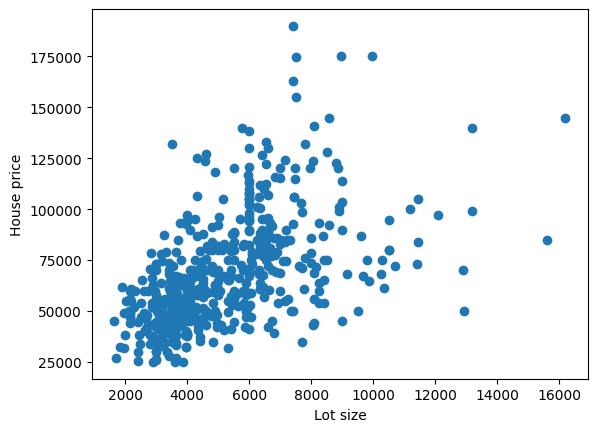

In [37]:
filename = "./data/simple_windsor.csv"
names = ["lotsize", "price"]
dataset = np.loadtxt(filename, delimiter=',').astype(np.int64)

X_full, y_full = dataset.T

plt.scatter(X_full, y_full)
plt.xlabel('Lot size')
plt.ylabel('House price')

<article class="message task"><a class="anchor" id="1"></a>
    <div class="message-header">
        <span>Task 1: Questions</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. In the cell below list and characterize 5 observations about the data.



</div></article>



In [23]:
## List reasons here
# 1. The data is not normally distributed
# 2. The data has outliers
# 3. The house price is not directly proportional to the lot size
# 4. There are less houses in the expensive price range
# 5. There are less houses in the large lot size range

### Splitting into train and test data
The following cell splits the dataset into $80\%$ training data and $20\%$ test data using the scikit-learn library
:


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

## Polynomial regression
The following exercise guides you through the steps (1-4) for learning the polynomial model.
1. Define the model, e.g. line or polynomial.
2. Identitfy knowns and uknowns.
3. Construct the design matrix $A$ for the dataset (see the `get_design_matrix`
 function below).
4. Estimate the model parameters using linear least squares ( [Task 2](#estimate) ).

The function `get_design_matrix`
 (defined in the cell below) creates a design matrix for a polynomial of order $N$.


In [25]:
def get_design_matrix(x, order=1):
    """
    Get the coefficients of polynomial in a least square sense of order N.
    
    :param x: Must be numpy array of size (N).
    :order n: Order of Polynomial.
    """
    
    if order < 1 or x.ndim != 1:
        return x

    count = x.shape[0]
    matrix = np.ones((count, order + 1), np.float64)

    for i in range(1, order+1):
        matrix[:, i] = x**i

    return matrix

order = 2

A_train = get_design_matrix(X_train, order=order)
A_test = get_design_matrix(X_test, order=order)

<article class="message task"><a class="anchor" id="estimate"></a>
    <div class="message-header">
        <span>Task 2: Estimate model parameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Implement the function `train(X, y, order)`
 in the cell below to learn the model parameters. Use `get_design_matrix(X, order)`
 to create the design matrix.


</div></article>



In [26]:
def train(X, y, order):
    """
    :param X: Input vector.
    :param y: Training data values.
    :param order: Order of the model to estimate.
    
    :return: Parameters of model.
    """
    A = get_design_matrix(X, order=order)

    return np.linalg.lstsq(A, y, rcond=None)[0]

<article class="message task"><a class="anchor" id="predict"></a>
    <div class="message-header">
        <span>Task 3: Define prediction model</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Use the learned model parameters to predict house prices given an input vector $X$ of lot sizes. Implement the prediction function `predict(X, params)`
 in the cell below. 


</div></article>



In [27]:
def predict(X, w):
    """
    :param X: Input vector.
    :param w: Estimated parameters.
    
    :return: Predicted y-values.
    """

    # Infer polynomial order from parameters
    order = w.shape[0]-1
    A = get_design_matrix(X, order)

    # Predict y-values
    y = np.dot(A, w)

    return y

<article class="message task"><a class="anchor" id="learn"></a>
    <div class="message-header">
        <span>Task 4: Prediction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In this task you will use the learnt model parameters for making predictions of house prices given lot sizes. Implement the following steps (marked by `#`
) in the code cell below.
1. Learn model parameters using `X_train`
 and `y_train`
. 
2. In the cell below calculate the predicted house prices (`y`
-values) given the lot-sizes defined in the `values`
 variable.
3. Plot the predicted house prices as a line-plot.



</div></article>



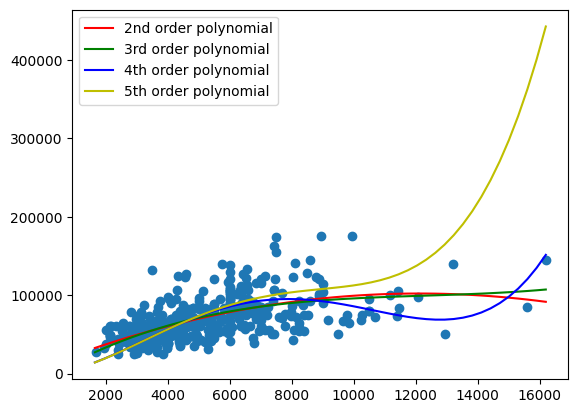

In [55]:
values = np.linspace(X_full.min(), X_full.max(), 50)

# 1. Learn model parameters
model_parameter_2 = train(X_train, y_train, 2)
model_parameter_3 = train(X_train, y_train, 3)
model_parameter_4 = train(X_train, y_train, 4)
model_parameter_5 = train(X_train, y_train, 5)

# 2. Evaluate model
y_predicted_2 = predict(values, model_parameter_2)
y_predicted_3 = predict(values, model_parameter_3)
y_predicted_4 = predict(values, model_parameter_4)
y_predicted_5 = predict(values, model_parameter_5)

# 3. Plot predicted values
plt.scatter(X_train, y_train)
plt.plot(values, y_predicted_2, "r", label = "2nd order polynomial")
plt.plot(values, y_predicted_3, "g", label = "3rd order polynomial")
plt.plot(values, y_predicted_4, "b", label = "4th order polynomial")
plt.plot(values, y_predicted_5, "y", label = "5th order polynomial")
plt.legend()

<article class="message task"><a class="anchor" id="experiment"></a>
    <div class="message-header">
        <span>Task 5: Order of Polynomial</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


In this task you will experiment with the order of the polynomial model to investigate performance.
1. Increase the order of the polynomial and evaluate the results for:    1. A $3$rd-order polynomial.
    2. A $4$th-order polynomial.
    3. A $7$th-order polynomial.
    4. An $11$th-order polynomial.



Observe that the predictions deviate drastically from the actual lot sizes for the $7$th-order polynomial and above. 
1. Explain why this happens? 



</div></article>

This problem can be solved by normalizing the input vectors. Normalization transforms the input values to the interval $[0, 1]$ by scaling and translating the inputs using the minimum and maximum values.
The cell below provides functions for normalizing and denormalizing (the inverse transformation) input vectors:


In [ ]:
# Q2 The model seems to be overfitting as it starts to account for the noise in the data.

In [40]:
def normalized(X):
    n = (X - np.min(X_full))/np.max(X_full)
    return n

def denormalized(X):
    return X*np.max(X_full) + np.min(X_full)

<article class="message task"><a class="anchor" id="poly_high"></a>
    <div class="message-header">
        <span>Task 6:  Higher order polynomials with normalization</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


In this task you will redo [Task 4](#learn) using normalization. Write your solution in the cell below.
1. Normalize the inputs in the variable `X_{train}`
 using the function`normalized`
. 
2. Re-train the model parameters using the normalized inputs using $3$rd, $4$th, and $7$th order polynomials as in [Task 4](#learn).
3. Predict the values of (normalized) `X_{test}`
.
4. Plot the predicted result as a curve using `plt.plot`




</div></article>



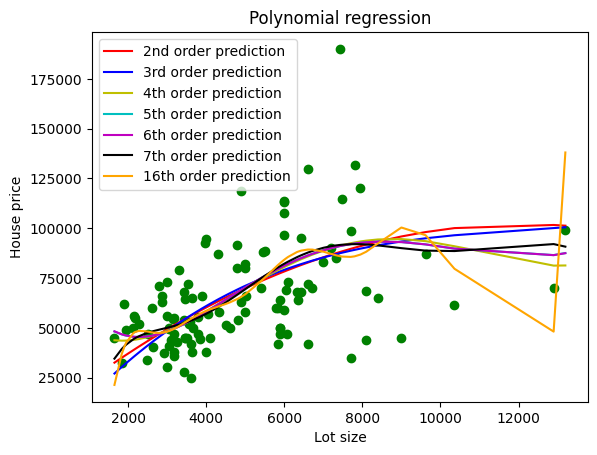

In [44]:
# 1. Normalize the inputs
normalized_X_train = normalized(X_train)
normalized_X_test = normalized(X_test)

# 2. Learn parameters and predict y-values

# First learn the model parameters
model_parameter_2 = train(normalized_X_train, y_train, 2)
model_parameter_3 = train(normalized_X_train, y_train, 3)
model_parameter_4 = train(normalized_X_train, y_train, 4)
model_parameter_5 = train(normalized_X_train, y_train, 5)
model_parameter_6 = train(normalized_X_train, y_train, 6)
model_parameter_7 = train(normalized_X_train, y_train, 7)
model_parameter_16 = train(normalized_X_train, y_train, 16)

# Now to predict y-values
y_predicted_2 = predict(normalized_X_test, model_parameter_2)
y_predicted_3 = predict(normalized_X_test, model_parameter_3)
y_predicted_4 = predict(normalized_X_test, model_parameter_4)
y_predicted_5 = predict(normalized_X_test, model_parameter_5)
y_predicted_6 = predict(normalized_X_test, model_parameter_6)
y_predicted_7 = predict(normalized_X_test, model_parameter_7)
y_predicted_16 = predict(normalized_X_test, model_parameter_16)

# Sort X_test and corresponding y_predicted for a smooth plot
sorted_indices = np.argsort(X_test)
X_test_sorted = X_test[sorted_indices]

y_predicted_sorted_2 = y_predicted_2[sorted_indices]
y_predicted_sorted_3 = y_predicted_3[sorted_indices]
y_predicted_sorted_4 = y_predicted_4[sorted_indices]
y_predicted_sorted_5 = y_predicted_5[sorted_indices]
y_predicted_sorted_6 = y_predicted_6[sorted_indices]
y_predicted_sorted_7 = y_predicted_7[sorted_indices]
y_predicted_sorted_16 = y_predicted_16[sorted_indices]

# 3. Plot predicted values
plt.scatter(X_test, y_test, c="g")
plt.plot(X_test_sorted, y_predicted_sorted_2, "r", label="2nd order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_3, "b", label="3rd order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_4, "y", label="4th order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_5, "c", label="5th order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_6, "m", label="6th order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_7, "k", label="7th order prediction")
plt.plot(X_test_sorted, y_predicted_sorted_16, "orange", label="16th order prediction")
plt.legend()
plt.title("Polynomial regression")
plt.xlabel('Lot size')
plt.ylabel('House price')
plt.show()

<article class="message task"><a class="anchor" id="improvement"></a>
    <div class="message-header">
        <span>Task 7: Normalization improvement</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Visually inspect and reason about how normalization impacts the results.
2. Explain why normalization achieves a better performance.



</div></article>



In [0]:
# 7.1
# After training the model on normalized data, the model seems to not make as drastic fluctuations as before.
# Before on the 6th order polynomial we could identify a lot of overfitting but the model trained on normalized data
# seems to be a lot more accurate and not overfitting as much.
#
# 7.2
# The reason why normalization achieves better performance is because you take out the varying scales of the input data.
# Thus the model should be mostly based on the patterns in the data and not on the scale of the data.

## Evaluation
In the following steps you will evaluate the models using the _root mean squarred error_ (RMSE) on unseen data (test data). 
The _root mean squared error_ is defined as:

$$
 \sqrt{\frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2}
$$

and calculates the average error measured in the same units as the house prices. 
The code cell below provides an implementation of the RMSE:


In [56]:
def rmse(X, y, w):
    X = normalized(X)
    ym = predict(X, w)
    return np.sqrt(np.mean((y-ym)**2))

<article class="message task"><a class="anchor" id="evaluation"></a>
    <div class="message-header">
        <span>Task 8: Model evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In this task you will implement the function `evaluate_models`
 to evaluate polynomial models of order 1 to 19 using the _root mean squared error_. 
For each model order:
1. Learn the model parameters using the `train`
 function.
2. Calculate the _root mean squared error_ of the model on the training set.
3. Calculate the _root mean squared error_ of the model on the test set.



</div></article>



In [65]:
def evaluate_models():
    """Calculates the RMS error for both training and test data for models with polynomial orders
    from 1 to 19.
    
    Returns: (train losses, test losses)
    """
    losses_train = []
    losses_test = []
    for order in range(1, 19):

        normalized_X_train = normalized(X_train)
        normalized_X_test = normalized(X_test)

        model_param_train = train(normalized_X_train, y_train, order)

        rmse_train = rmse(X_train, y_train, model_param_train)
        rmse_test = rmse(X_test, y_test, model_param_train)

        losses_train.append(rmse_train)
        losses_test.append(rmse_test)
    return losses_train, losses_test

<article class="message task"><a class="anchor" id="plotting"></a>
    <div class="message-header">
        <span>Task 9: Plotting results</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Plot the training and test losses in the cell below. 
2. Explain why the test and training losses behave differently as the order of the polynomial increases.
3. Use RMSE and the plot(s) to argue what could be the consequences of using these models given that they have these properties. 



</div></article>



Text(0, 0.5, 'RMSE')

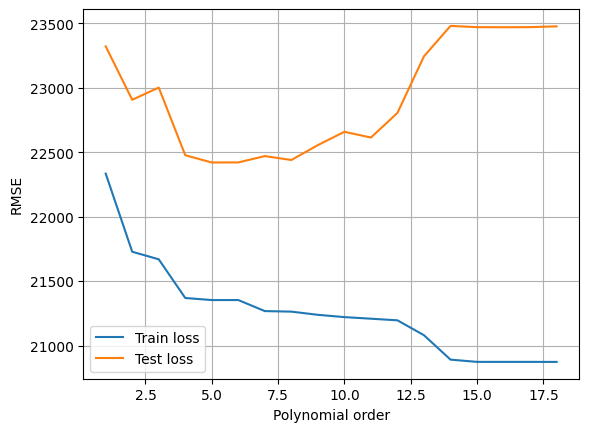

In [75]:
train_losses, test_losses = evaluate_models()

plt.plot(range(1, 19), train_losses, label="Train loss")
plt.plot(range(1, 19), test_losses, label="Test loss")
plt.legend()
plt.grid()
plt.xlabel("Polynomial order")
plt.ylabel("RMSE")

<article class="message task"><a class="anchor" id="reflection"></a>
    <div class="message-header">
        <span>Task 10: Reflection</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on whether it's possible and reasonable to chose a higher order polynomial for improving the training loss. Use the plot in your argumentation. 



</div></article>



In [0]:
# Seen on the "train loss" plot we can see that the RMSE is decreasing as the polynomial order increases.
# This may be due to overfitting as the model is trying to fit the noise in the data.
# As we now compare it to the "Test loss" plot (which is the RMSE of the model compared to the test data - which the model has not seen before)
# we get a different result.
# Here we first see that the RMSE is decreasing as the polynomial order increases, but after the about 6th order polynomial the RMSE starts to increase.
# This thus proves that going beyond the 6th order polynomial is overfitting the model to the training data.